# Capstone Project 1: Bike Rental Business

# Importing the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler

In [3]:
# Uploading the data frame

bike = pd.read_csv('day.csv')

In [4]:
bike.head(20)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [5]:
# Check the descriptive information
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
bike.shape

(730, 16)

# Data Quality Check and Cleaning

In [8]:
# Percentage of missing values in each column
round(100*(bike.isnull().sum()/len(bike)), 2).sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [9]:
# Row-wise null count percentage
round((bike.isnull().sum(axis=1)/len(bike))*100,2).sort_values(ascending=False)

0      0.0
479    0.0
481    0.0
482    0.0
483    0.0
      ... 
245    0.0
246    0.0
247    0.0
248    0.0
729    0.0
Length: 730, dtype: float64

In [10]:
bike_dup = bike.copy()

# Checking for duplicates and dropping the entire duplicate row if there is any

bike_dup.drop_duplicates(subset=None, inplace=True)
bike_dup.shape

(730, 16)

In [11]:
bike.shape

(730, 16)

In [12]:
# Dropping reduntant columns

bike.columns
bike_new=bike[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]


In [13]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


# Creating Dummy Variables 

In [14]:
# Check the datatypes before converting to categorical
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [15]:
# Convert to 'category' data type

bike_new['season']=bike_new['season'].astype('category')
bike_new['weathersit']=bike_new['weathersit'].astype('category')
bike_new['mnth']=bike_new['mnth'].astype('category')
bike_new['weekday']=bike_new['weekday'].astype('category')

In [16]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [17]:
# This code does 3 things:
# 1) Create Dummy variable
# 2) Drop original variable for which the dummy was created
# 3) Drop first dummy variable for each set of dummies created.

bike_new = pd.get_dummies(bike_new, drop_first=True)
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    bool   
 9   season_3      730 non-null    bool   
 10  season_4      730 non-null    bool   
 11  mnth_2        730 non-null    bool   
 12  mnth_3        730 non-null    bool   
 13  mnth_4        730 non-null    bool   
 14  mnth_5        730 non-null    bool   
 15  mnth_6        730 non-null    bool   
 16  mnth_7        730 non-null    bool   
 17  mnth_8        730 non-null    bool   
 18  mnth_9        730 non-null    

In [18]:
bike_new 

bike_new = pd.DataFrame(bike_new)

# Identify boolean columns
bool_cols = bike_new .select_dtypes(include='bool').columns

# Convert boolean columns to uint8
bike_new [bool_cols] = bike_new [bool_cols].astype('uint8')

# Verify the changes
print(bike_new .dtypes)


yr                int64
holiday           int64
workingday        int64
temp            float64
atemp           float64
hum             float64
windspeed       float64
cnt               int64
season_2          uint8
season_3          uint8
season_4          uint8
mnth_2            uint8
mnth_3            uint8
mnth_4            uint8
mnth_5            uint8
mnth_6            uint8
mnth_7            uint8
mnth_8            uint8
mnth_9            uint8
mnth_10           uint8
mnth_11           uint8
mnth_12           uint8
weekday_1         uint8
weekday_2         uint8
weekday_3         uint8
weekday_4         uint8
weekday_5         uint8
weekday_6         uint8
weathersit_2      uint8
weathersit_3      uint8
dtype: object


In [19]:
bike_new.shape

(730, 30)

# Splitting the Data

Splitting the data to Train and Test sets

70:30 ratio

In [20]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

In [21]:
# Train and test application

np.random.seed(0)
df_train, df_test = train_test_split(bike_new, train_size = 0.70, test_size = 0.30, random_state = 333)

In [22]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 483 to 366
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   atemp         510 non-null    float64
 5   hum           510 non-null    float64
 6   windspeed     510 non-null    float64
 7   cnt           510 non-null    int64  
 8   season_2      510 non-null    uint8  
 9   season_3      510 non-null    uint8  
 10  season_4      510 non-null    uint8  
 11  mnth_2        510 non-null    uint8  
 12  mnth_3        510 non-null    uint8  
 13  mnth_4        510 non-null    uint8  
 14  mnth_5        510 non-null    uint8  
 15  mnth_6        510 non-null    uint8  
 16  mnth_7        510 non-null    uint8  
 17  mnth_8        510 non-null    uint8  
 18  mnth_9        510 non-null    uin

In [23]:
df_train.shape

(510, 30)

In [24]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 22 to 313
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            219 non-null    int64  
 1   holiday       219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   atemp         219 non-null    float64
 5   hum           219 non-null    float64
 6   windspeed     219 non-null    float64
 7   cnt           219 non-null    int64  
 8   season_2      219 non-null    uint8  
 9   season_3      219 non-null    uint8  
 10  season_4      219 non-null    uint8  
 11  mnth_2        219 non-null    uint8  
 12  mnth_3        219 non-null    uint8  
 13  mnth_4        219 non-null    uint8  
 14  mnth_5        219 non-null    uint8  
 15  mnth_6        219 non-null    uint8  
 16  mnth_7        219 non-null    uint8  
 17  mnth_8        219 non-null    uint8  
 18  mnth_9        219 non-null    uint

In [25]:
df_test.shape

(219, 30)

# Visualization of Numeric Variables

Using Seaborn and Pairplot for visualization

In [26]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 483 to 366
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   atemp         510 non-null    float64
 5   hum           510 non-null    float64
 6   windspeed     510 non-null    float64
 7   cnt           510 non-null    int64  
 8   season_2      510 non-null    uint8  
 9   season_3      510 non-null    uint8  
 10  season_4      510 non-null    uint8  
 11  mnth_2        510 non-null    uint8  
 12  mnth_3        510 non-null    uint8  
 13  mnth_4        510 non-null    uint8  
 14  mnth_5        510 non-null    uint8  
 15  mnth_6        510 non-null    uint8  
 16  mnth_7        510 non-null    uint8  
 17  mnth_8        510 non-null    uint8  
 18  mnth_9        510 non-null    uin

In [27]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

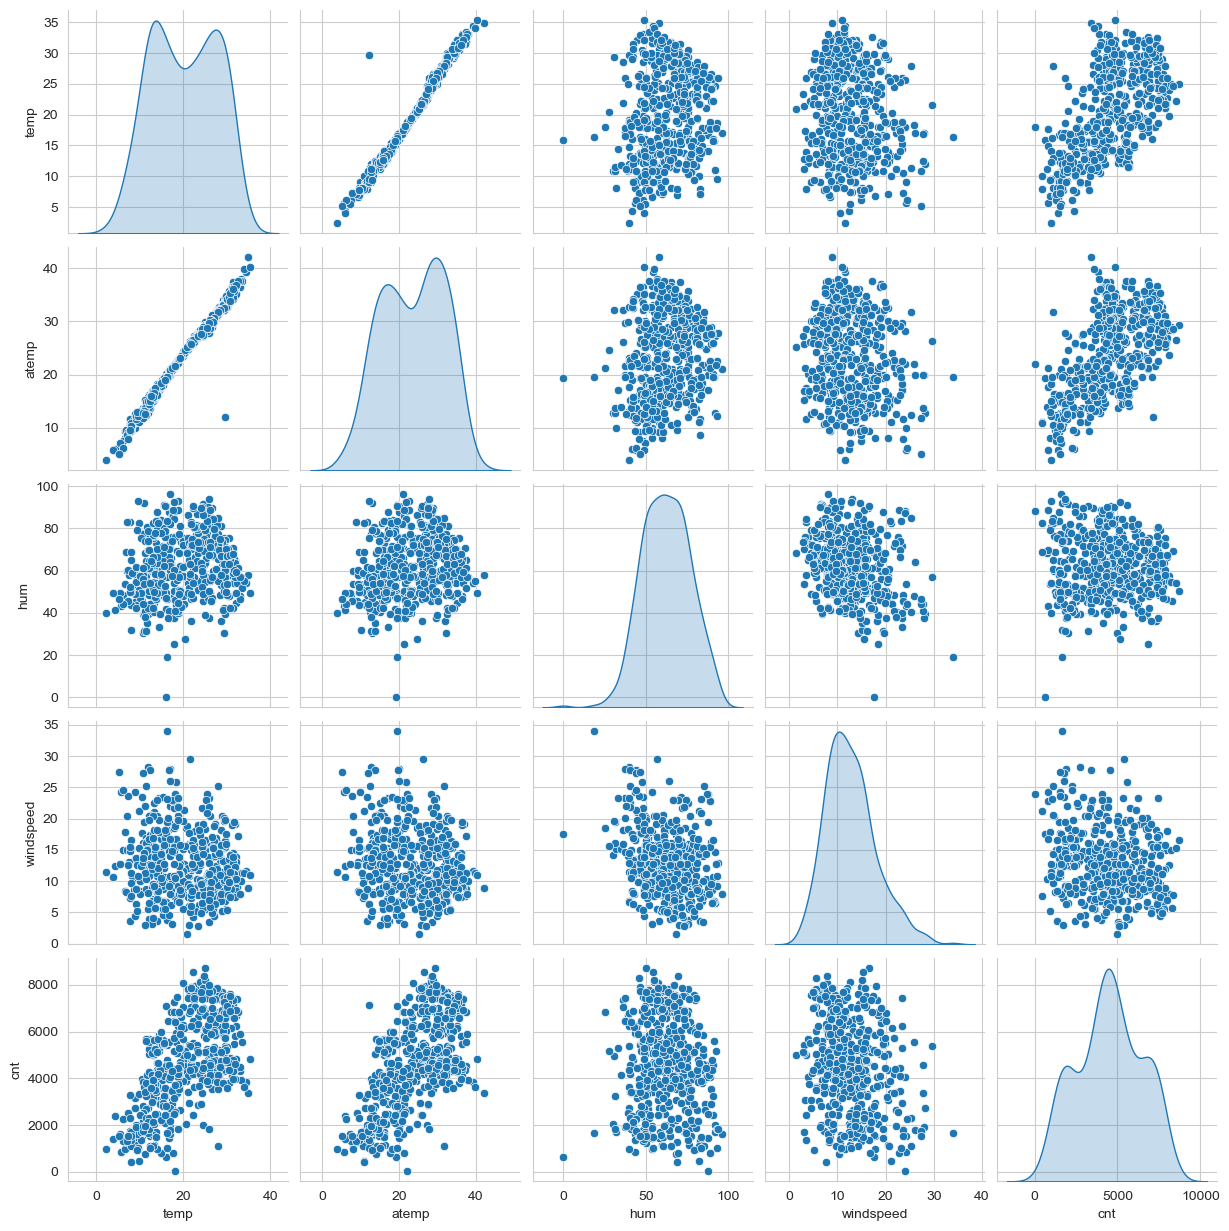

In [28]:
# Create a new dataframe of only numeric variables:

bike_num=df_train[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(bike_num, diag_kind='kde')
plt.show()

# Insights

The pairplot shows the linear relation between 'temp','atemp' and 'cnt'

# Visualising Categorical Variables

Using seaborn and boxplot for visualization

In [29]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 483 to 366
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   atemp         510 non-null    float64
 5   hum           510 non-null    float64
 6   windspeed     510 non-null    float64
 7   cnt           510 non-null    int64  
 8   season_2      510 non-null    uint8  
 9   season_3      510 non-null    uint8  
 10  season_4      510 non-null    uint8  
 11  mnth_2        510 non-null    uint8  
 12  mnth_3        510 non-null    uint8  
 13  mnth_4        510 non-null    uint8  
 14  mnth_5        510 non-null    uint8  
 15  mnth_6        510 non-null    uint8  
 16  mnth_7        510 non-null    uint8  
 17  mnth_8        510 non-null    uint8  
 18  mnth_9        510 non-null    uin

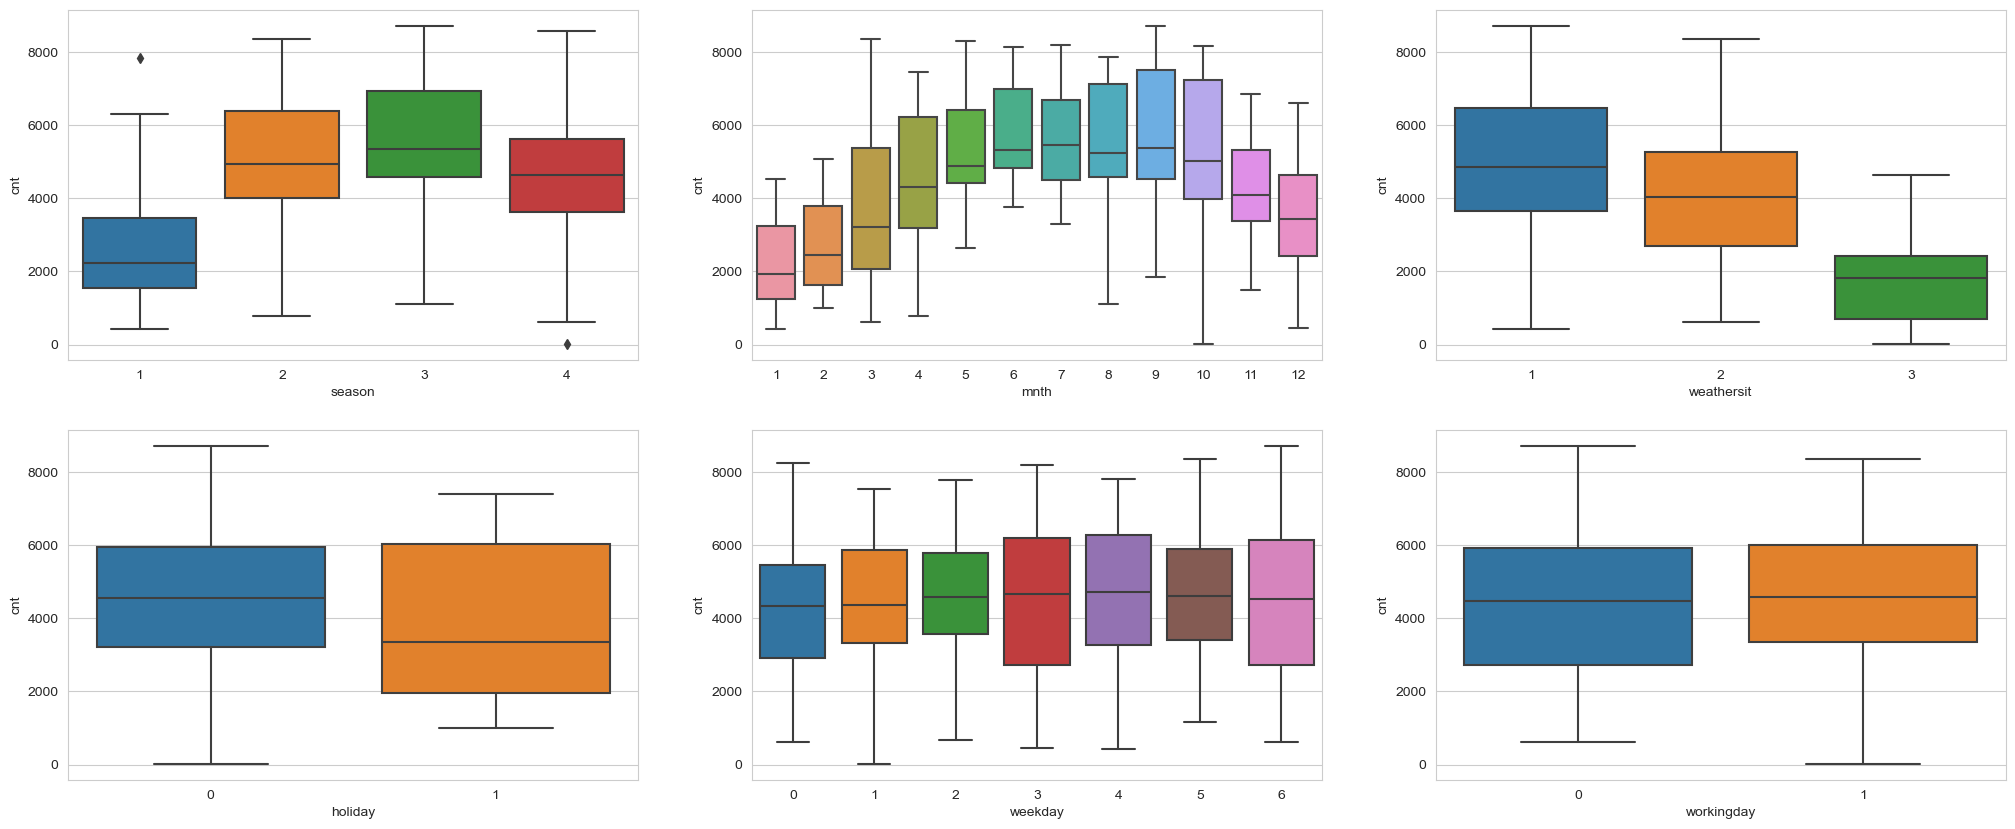

In [86]:
# Create boxplot of Categorical variables (before creating dummies) against the target variable 'cnt' 
# to see how each of the predictor variable stackup against the target variable.

plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.show()

# Insights

Season vs Count:
The count of bike rentals varies significantly across different seasons.
Season 3 and 4 show higher median counts compared to season 1 and 2, indicating that bike rentals might be more popular in certain times of the year.

Month vs Count:
The distribution of counts varies across different months.
There are noticeable peaks in certain months (e.g., months 6 to 10), which might suggest higher bike rentals during warmer months.

Weather Situation vs Count:
The count of bike rentals is affected by weather conditions.
Better weather conditions (weather situation 1) have higher median counts compared to adverse weather conditions (weather situation 3).

Holiday vs Count:
There is a variation in bike rentals on holidays versus non-holidays.
Non-holidays tend to have higher median counts compared to holidays.

Weekday vs Count:
The distribution of bike rentals across different weekdays shows some variation.
Some weekdays have slightly higher median counts, but the variation is less pronounced compared to other factors like season and weather.

Working Day vs Count:
There is a noticeable difference in bike rentals on working days versus non-working days.
Working days tend to have higher median counts compared to non-working days.

Summary:
Seasonality and weather conditions have a significant impact on the count of bike rentals.
Month and working day status also influence bike rentals, suggesting that warmer months and working days see higher usage.
Holiday status and weekday show some variation but are less influential compared to the other factors.
These insights can help in understanding the patterns of bike rentals and in planning for resource allocation or marketing strategies based on these factors.

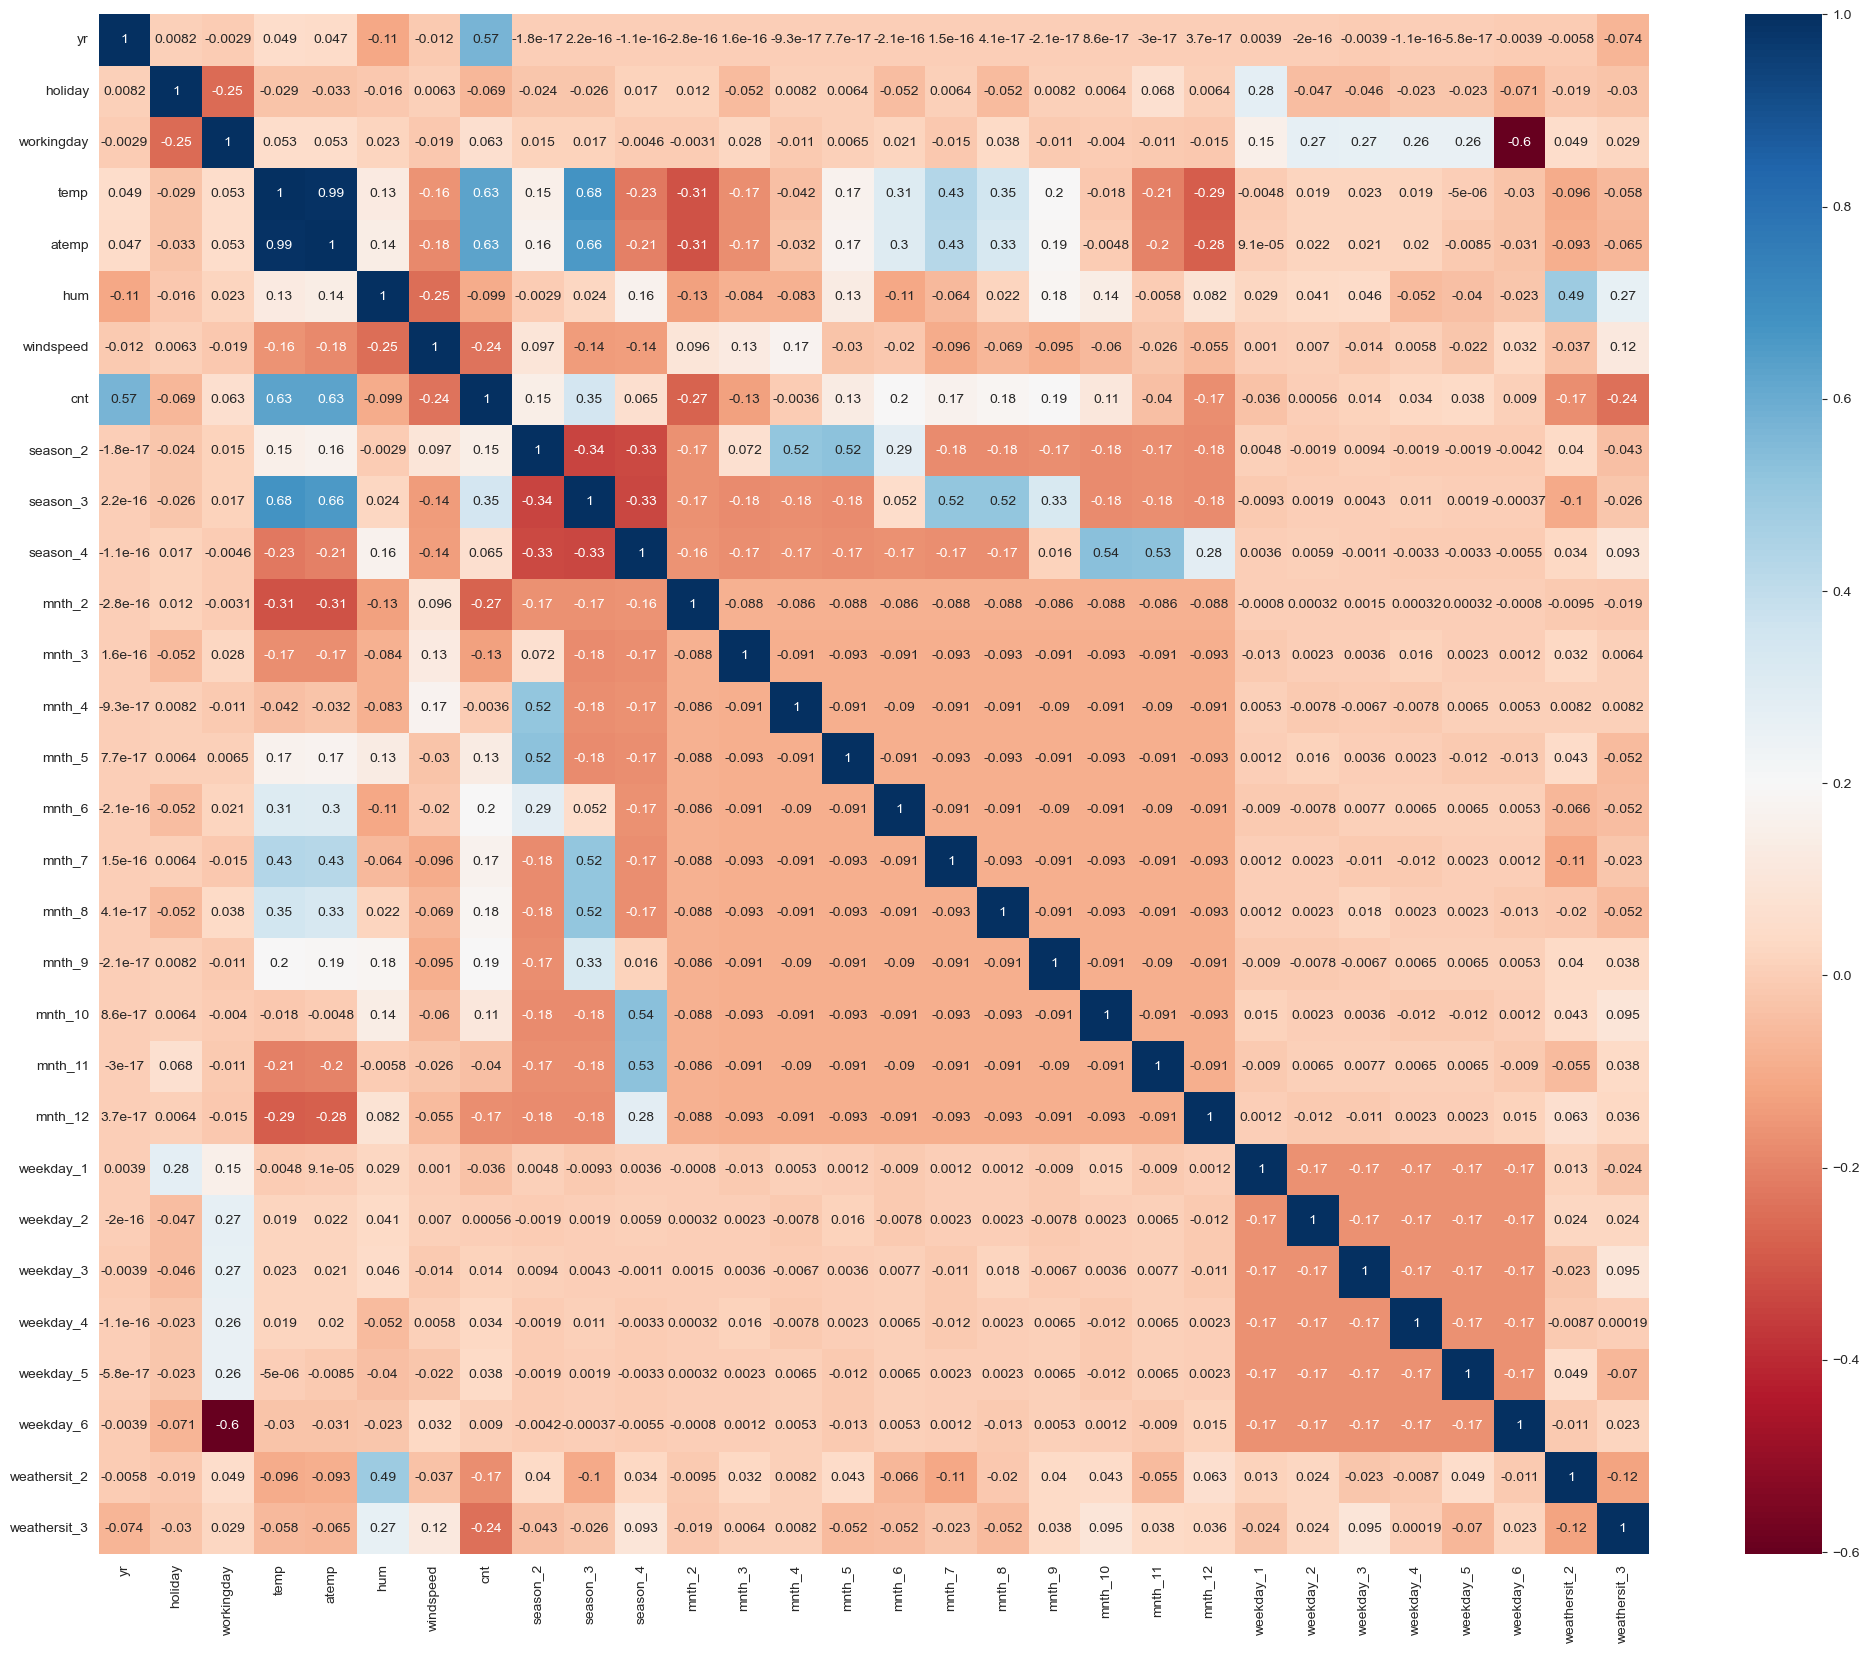

In [31]:
# Checking for correlation 

plt.figure(figsize = (25,20))
sns.heatmap(bike_new.corr(), annot = True, cmap="RdBu")
plt.show()

# Insights

The heatmap illustrates variables that display multicollinearity and those that show strong collinearity with the target variable. We will refer to this map during the linear model construction to evaluate various correlated values. This evaluation, along with VIF and p-values, will guide us in deciding which variables to include or exclude from the model.

# Rescaling the features

In [32]:
# Rescaling
scaler = MinMaxScaler()


In [33]:
# Checking the values before scaling
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
483,1,0,0,18.791653,22.50605,58.7083,7.832836,6304,1,0,...,0,0,0,0,0,0,0,0,0,0
650,1,0,0,16.126653,19.56980,49.4583,9.791514,7109,0,0,...,0,0,0,0,0,0,0,1,0,0
212,0,0,1,31.638347,35.16460,55.0833,10.500039,4266,0,1,...,0,0,1,0,0,0,0,0,0,0
714,1,0,0,14.862500,18.49690,83.8750,6.749714,3786,0,0,...,0,1,0,0,0,0,0,0,1,0
8,0,0,0,5.671653,5.80875,43.4167,24.250650,822,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
# Apply scaler to numeric variables

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [35]:
# Checking values after scaling
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
483,1,0,0,0.497426,0.487055,0.609956,0.194850,0.722734,1,0,...,0,0,0,0,0,0,0,0,0,0
650,1,0,0,0.416433,0.409971,0.513852,0.255118,0.815347,0,0,...,0,0,0,0,0,0,0,1,0,0
212,0,0,1,0.887856,0.819376,0.572294,0.276919,0.488265,0,1,...,0,0,1,0,0,0,0,0,0,0
714,1,0,0,0.378013,0.381804,0.871429,0.161523,0.433042,0,0,...,0,1,0,0,0,0,0,0,1,0
8,0,0,0,0.098690,0.048706,0.451083,0.700017,0.092039,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.501961,0.023529,0.682353,0.540901,0.515631,0.647390,0.346318,0.515144,0.247059,0.262745,...,0.086275,0.076471,0.139216,0.141176,0.150980,0.129412,0.145098,0.150980,0.341176,0.025490
std,0.500487,0.151726,0.466018,0.227898,0.213626,0.149722,0.160266,0.224281,0.431725,0.440557,...,0.281045,0.266010,0.346511,0.348545,0.358381,0.335985,0.352545,0.358381,0.474570,0.157763
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.343228,0.335807,0.536147,0.230784,0.359468,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.525578,0.646367,0.325635,0.516337,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.740406,0.692378,0.757900,0.434287,0.685861,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Building a linear model

In [37]:
#Dropping the variable count

y_train = df_train.pop('cnt')
X_train = df_train

In [38]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(estimator=lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [39]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 14),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 7),
 ('mnth_3', True, 1),
 ('mnth_4', False, 3),
 ('mnth_5', False, 2),
 ('mnth_6', False, 4),
 ('mnth_7', False, 15),
 ('mnth_8', False, 5),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 8),
 ('mnth_12', False, 9),
 ('weekday_1', False, 6),
 ('weekday_2', False, 13),
 ('weekday_3', False, 11),
 ('weekday_4', False, 12),
 ('weekday_5', False, 10),
 ('weekday_6', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [40]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'season_2',
       'season_3', 'season_4', 'mnth_3', 'mnth_9', 'mnth_10', 'weekday_6',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [41]:
X_train.columns[~rfe.support_]

Index(['holiday', 'mnth_2', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8',
       'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5'],
      dtype='object')

In [42]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

# Model 1

In [43]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,384.22
3,atemp,363.12
4,hum,17.52
7,season_3,7.09
5,windspeed,4.71
1,workingday,4.61
6,season_2,3.54
8,season_4,3.01
13,weathersit_2,2.14
0,yr,2.02


In [44]:
import statsmodels.api as sm

# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [45]:
# Check the parameters obtained

lr1.params

const           0.195340
yr              0.228741
workingday      0.040787
temp            0.433878
atemp           0.058635
hum            -0.178382
windspeed      -0.184925
season_2        0.130228
season_3        0.079599
season_4        0.153475
mnth_3          0.047149
mnth_9          0.100017
mnth_10         0.054370
weekday_6       0.054618
weathersit_2   -0.047472
weathersit_3   -0.271174
dtype: float64

In [46]:
# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.1
Date:                Mon, 03 Jun 2024   Prob (F-statistic):          1.28e-186
Time:                        21:15:02   Log-Likelihood:                 509.26
No. Observations:                 510   AIC:                            -986.5
Df Residuals:                     494   BIC:                            -918.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1953      0.030      6.576   

# Model 2
Removing the variable 'atemp' based on its High p-value & High VIF

Keeping 'temperature' as it is generally significant for businesses like bike rentals

In [47]:
X_train_new = X_train_rfe.drop(["atemp"], axis = 1)

In [48]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,23.21
3,hum,17.23
6,season_3,7.01
1,workingday,4.60
4,windspeed,4.55
5,season_2,3.54
7,season_4,3.01
12,weathersit_2,2.14
0,yr,2.02
11,weekday_6,1.79


In [49]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [50]:
# Check the parameters obtained

lr2.params

const           0.196221
yr              0.228723
workingday      0.040773
temp            0.489280
hum            -0.177805
windspeed      -0.187198
season_2        0.130352
season_3        0.078664
season_4        0.153732
mnth_3          0.047295
mnth_9          0.100029
mnth_10         0.054438
weekday_6       0.054705
weathersit_2   -0.047620
weathersit_3   -0.271535
dtype: float64

In [51]:
# Print a summary of the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     187.9
Date:                Mon, 03 Jun 2024   Prob (F-statistic):          1.00e-187
Time:                        21:15:02   Log-Likelihood:                 509.17
No. Observations:                 510   AIC:                            -988.3
Df Residuals:                     495   BIC:                            -924.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1962      0.030      6.627   

# Model 3 
Dropping column 'hum' because of it's high VIF score

Keeping 'temperature' as it is generally significant for businesses like bike rentals

In [52]:
#Dropping column 'hum' 
X_train_new = X_train_new.drop(["hum"], axis = 1)

In [53]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,16.81
5,season_3,6.75
3,windspeed,4.27
1,workingday,4.11
4,season_2,3.51
6,season_4,2.89
0,yr,2.02
9,mnth_10,1.66
10,weekday_6,1.66
11,weathersit_2,1.54


In [54]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [55]:
lr3.params

const           0.091594
yr              0.233129
workingday      0.042443
temp            0.456709
windspeed      -0.148815
season_2        0.131914
season_3        0.087922
season_4        0.150243
mnth_3          0.055303
mnth_9          0.091371
mnth_10         0.053320
weekday_6       0.055451
weathersit_2   -0.077149
weathersit_3   -0.324223
dtype: float64

In [56]:
# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     192.2
Date:                Mon, 03 Jun 2024   Prob (F-statistic):          4.52e-184
Time:                        21:15:02   Log-Likelihood:                 497.71
No. Observations:                 510   AIC:                            -967.4
Df Residuals:                     496   BIC:                            -908.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0916      0.020      4.509   

# Model 4
Dropping column 'season_3' because of it's high VIF score

Keeping 'temperature' as it is generally significant for businesses like bike rentals

In [57]:
X_train_new = X_train_new.drop(["season_3"], axis = 1)

In [58]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.92
3,windspeed,4.15
1,workingday,4.07
0,yr,2.01
5,season_4,1.98
9,weekday_6,1.66
8,mnth_10,1.63
4,season_2,1.56
10,weathersit_2,1.54
7,mnth_9,1.23


In [59]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [60]:
# Check the parameters obtained

lr4.params

const           0.076726
yr              0.231340
workingday      0.042231
temp            0.568327
windspeed      -0.153306
season_2        0.083704
season_4        0.119733
mnth_3          0.044132
mnth_9          0.102838
mnth_10         0.041927
weekday_6       0.056942
weathersit_2   -0.077340
weathersit_3   -0.316638
dtype: float64

In [61]:
# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     200.2
Date:                Mon, 03 Jun 2024   Prob (F-statistic):          1.56e-181
Time:                        21:15:02   Log-Likelihood:                 488.92
No. Observations:                 510   AIC:                            -951.8
Df Residuals:                     497   BIC:                            -896.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0767      0.020      3.775   

# Model 5
Dropping column 'mnth_10' because of it's P value

In [62]:
X_train_new = X_train_new.drop(["mnth_10"], axis = 1)

In [63]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.80
3,windspeed,4.11
1,workingday,4.07
0,yr,2.00
8,weekday_6,1.66
4,season_2,1.56
9,weathersit_2,1.53
5,season_4,1.41
7,mnth_9,1.20
6,mnth_3,1.15


In [64]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

In [65]:
# Check the parameters obtained

lr5.params

const           0.074194
yr              0.230191
workingday      0.042294
temp            0.575607
windspeed      -0.156154
season_2        0.082553
season_4        0.134820
mnth_3          0.044834
mnth_9          0.096439
weekday_6       0.057422
weathersit_2   -0.075711
weathersit_3   -0.311216
dtype: float64

In [66]:
# Print a summary of the linear regression model obtained
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     216.0
Date:                Mon, 03 Jun 2024   Prob (F-statistic):          1.39e-181
Time:                        21:15:02   Log-Likelihood:                 486.24
No. Observations:                 510   AIC:                            -948.5
Df Residuals:                     498   BIC:                            -897.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0742      0.020      3.640   

# Model 6

Dropping column 'mnth_3' because of it's P value


In [67]:
X_train_new = X_train_new.drop(["mnth_3"], axis = 1)

In [68]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.72
3,windspeed,4.02
1,workingday,4.01
0,yr,2.00
7,weekday_6,1.65
4,season_2,1.56
8,weathersit_2,1.52
5,season_4,1.38
6,mnth_9,1.20
9,weathersit_3,1.07


In [69]:
# Add a constant
X_train_lm6 = sm.add_constant(X_train_new)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

In [70]:
# Check the parameters obtained

lr6.params

const           0.084143
yr              0.230846
workingday      0.043203
temp            0.563615
windspeed      -0.155191
season_2        0.082706
season_4        0.128744
mnth_9          0.094743
weekday_6       0.056909
weathersit_2   -0.074807
weathersit_3   -0.306992
dtype: float64

In [71]:
# Print a summary of the linear regression model obtained
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     233.8
Date:                Mon, 03 Jun 2024   Prob (F-statistic):          3.77e-181
Time:                        21:15:02   Log-Likelihood:                 482.39
No. Observations:                 510   AIC:                            -942.8
Df Residuals:                     499   BIC:                            -896.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0841      0.020      4.168   

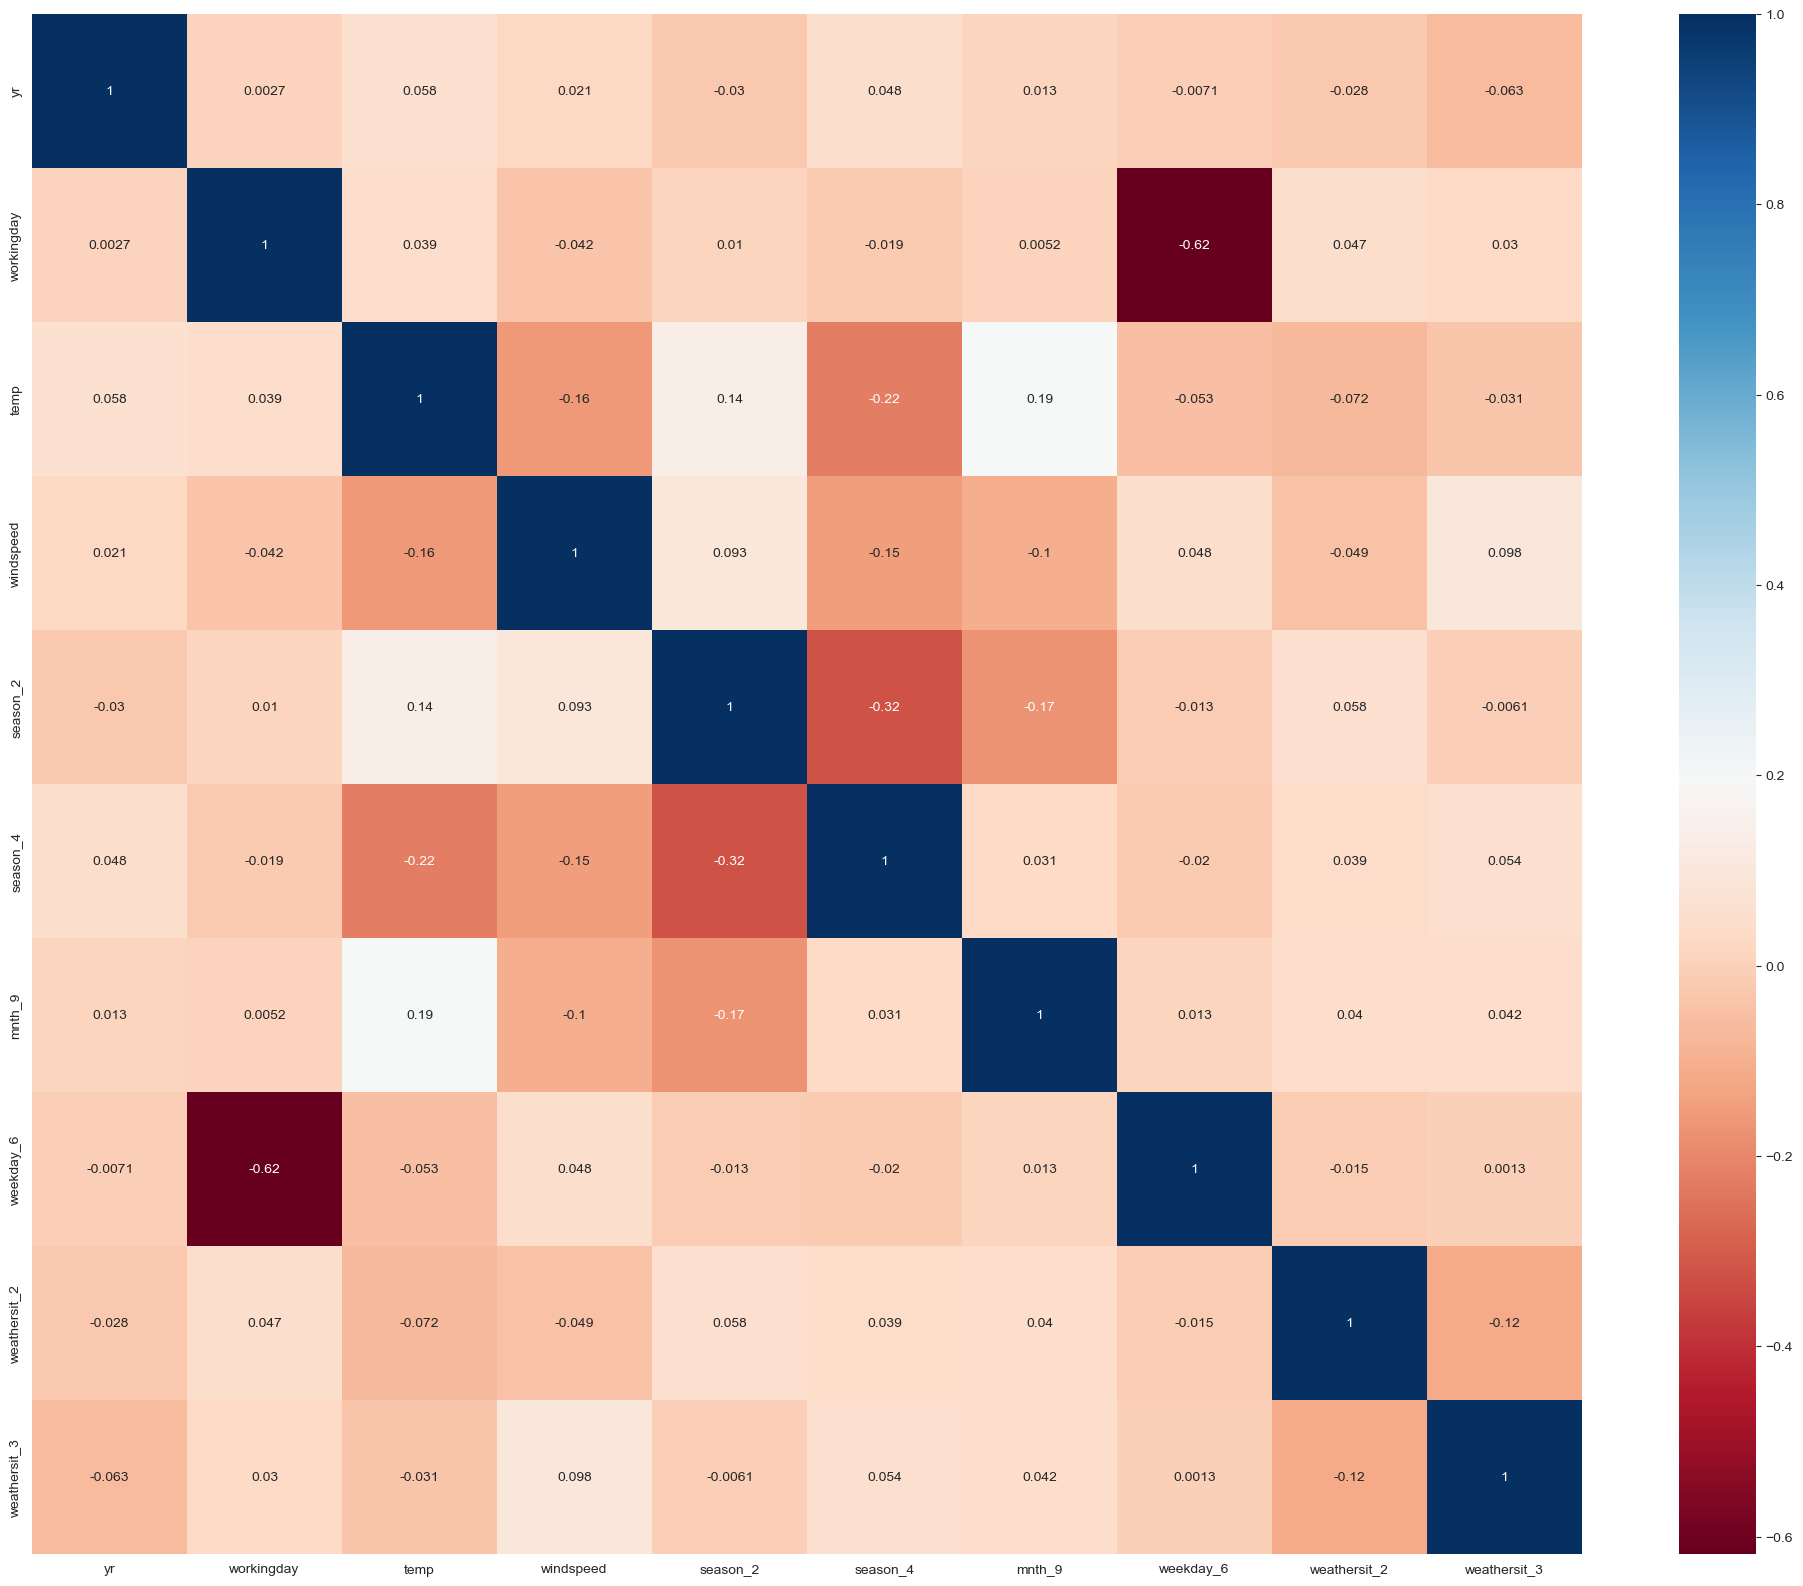

In [72]:
# Checking for correlation 

plt.figure(figsize = (25,20))
sns.heatmap(X_train_new.corr(), annot = True, cmap="RdBu")
plt.show()

# Insights

The heatmap shows low multicollinearity scores within the independent variables.

The fitness of the train model is also established with the P-values of 0.

We can complete the evaluation of the model after comparing the results of train and test data metrics.

# Final Model Intepretation

Hypothesis Testing:

Hypothesis testing states that:

H0:B1=B2=...=Bn=0 H1: at least one Bi!=0

lr6 model coefficient values

const 0.084143 yr 0.230846 workingday 0.043203 temp 0.563615 windspeed -0.155191 season_2 0.082706 season_4 0.128744 mnth_9 0.094743 weekday_6 0.056909 weathersit_2 -0.074807 weathersit_3 -0.306992

Insights

From the lr6 model summary, it is evident that all our coefficients are not equal to zerowhich means We REJECT the NULL HYPOTHESIS

F Statistics F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.

F-statistic: 233.8 Prob (F-statistic): 3.77e-181

The F-Statistics value of 233 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant

The equation of best fitted surface based on model lr6:

cnt = 0.084143 + (yr × 0.230846) + (workingday × 0.043203) + (temp × 0.563615) − (windspeed × 0.155191) + (season2 × 0.082706) + (season4 ×0.128744) + (mnth9 × 0.094743) + (weekday6 ×0.056909) − (weathersit2 × 0.074807) − (weathersit3 × 0.306992)

# Linear relationship between X and Y

Testing the regression model and visualization of numeric variables using seaborn and pairplot

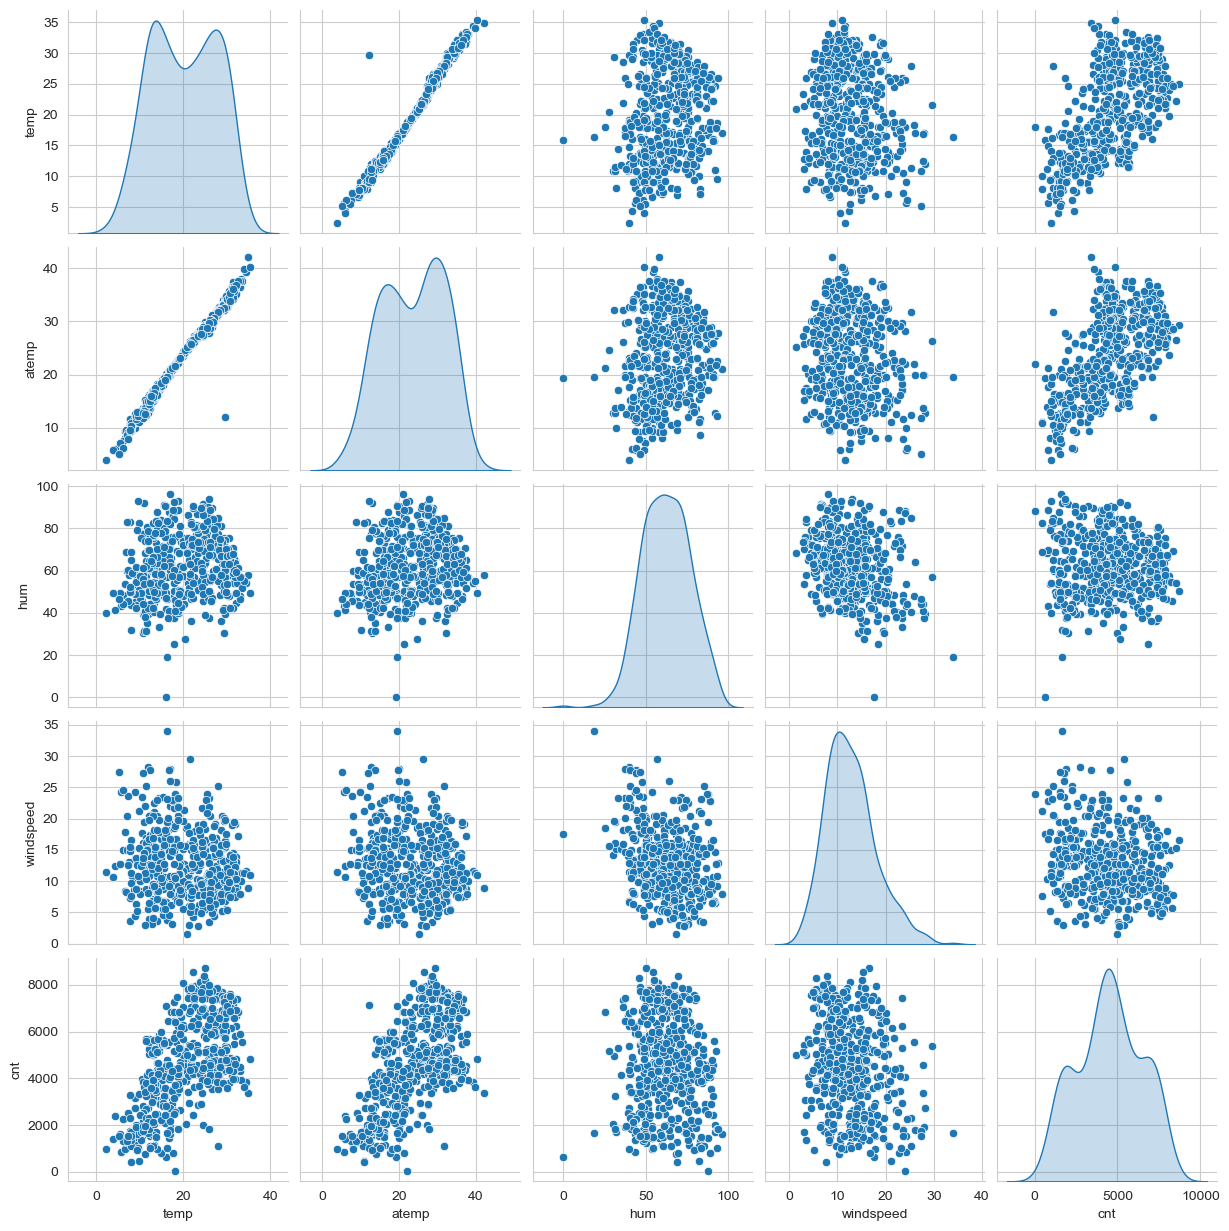

In [73]:
bike_new=bike_new[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(bike_num, diag_kind='kde')
plt.show()

The graph shows the linear relationship between variables 'count', 'temperature; and 'atemp'

# Making predictions using the final model

Making predictions using model 6

In [75]:
# Apply scaler to all numeric variables in test dataset. Note: we will only use scaler transform, 
# as we want to use the metrics that the model learned from the training data to be applied on the test data. 
# In other words, we want to prevent the information leak from train to test dataset.

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [76]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
22,0,0,0,0.046591,0.025950,0.453529,0.462217,0.110907,0,0,...,0,0,0,0,0,0,0,0,0,0
468,1,0,0,0.543115,0.536771,0.522511,0.347424,0.855729,1,0,...,0,0,0,0,0,0,0,1,0,0
553,1,0,0,0.951196,0.933712,0.596104,0.212829,0.534975,0,1,...,0,0,0,0,0,0,0,0,0,0
504,1,0,0,0.699909,0.662746,0.551083,0.478229,0.817648,1,0,...,0,0,0,0,0,0,0,0,0,0
353,0,0,1,0.407087,0.416610,0.618615,0.080770,0.428900,0,0,...,0,1,0,1,0,0,0,0,1,0


In [77]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.493151,0.041096,0.684932,0.551225,0.527528,0.662567,0.346706,0.518889,0.264840,0.246575,...,0.073059,0.105023,0.155251,0.146119,0.118721,0.173516,0.132420,0.127854,0.324201,0.036530
std,0.501098,0.198967,0.465607,0.229463,0.215434,0.143562,0.159553,0.219953,0.442259,0.432005,...,0.260830,0.307285,0.362974,0.354034,0.324202,0.379560,0.339723,0.334692,0.469148,0.188034
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.301299,0.073090,0.055683,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.356479,0.348019,0.553031,0.232689,0.364703,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.557653,0.549198,0.662338,0.328208,0.525771,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.751309,0.709163,0.762338,0.435708,0.676887,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.010390,0.824380,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [78]:
#Diving into X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 22 to 313
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            219 non-null    int64  
 1   holiday       219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   atemp         219 non-null    float64
 5   hum           219 non-null    float64
 6   windspeed     219 non-null    float64
 7   season_2      219 non-null    uint8  
 8   season_3      219 non-null    uint8  
 9   season_4      219 non-null    uint8  
 10  mnth_2        219 non-null    uint8  
 11  mnth_3        219 non-null    uint8  
 12  mnth_4        219 non-null    uint8  
 13  mnth_5        219 non-null    uint8  
 14  mnth_6        219 non-null    uint8  
 15  mnth_7        219 non-null    uint8  
 16  mnth_8        219 non-null    uint8  
 17  mnth_9        219 non-null    uint8  
 18  mnth_10       219 non-null    uint

In [79]:
#Selecting the variables that were part of final model.
col1=X_train_new.columns
X_test=X_test[col1]
# Adding constant variable to test dataframe
X_test_lm6 = sm.add_constant(X_test)
X_test_lm6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 22 to 313
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         219 non-null    float64
 1   yr            219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   windspeed     219 non-null    float64
 5   season_2      219 non-null    uint8  
 6   season_4      219 non-null    uint8  
 7   mnth_9        219 non-null    uint8  
 8   weekday_6     219 non-null    uint8  
 9   weathersit_2  219 non-null    uint8  
 10  weathersit_3  219 non-null    uint8  
dtypes: float64(3), int64(2), uint8(6)
memory usage: 11.5 KB


In [80]:
# Making predictions using the final model (lr6)

y_pred = lr6.predict(X_test_lm6)

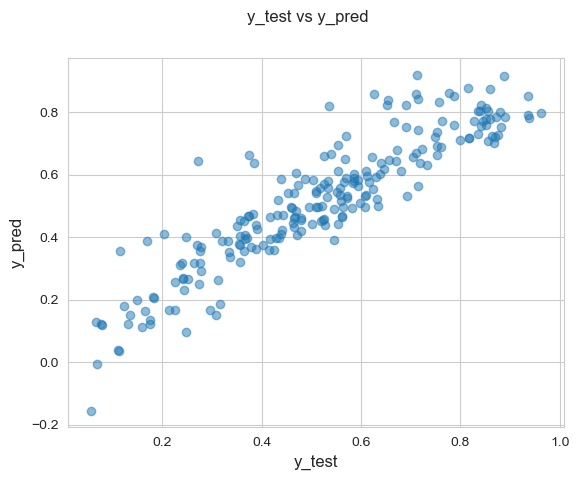

In [87]:
# Plotting y_test and y_pred

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 12)              
plt.xlabel('y_test', fontsize = 12)                          
plt.ylabel('y_pred', fontsize = 12) 
plt.show()

# R^2 Value for TEST

In [82]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8203092200749706

# Adjusted R^2 Value for TEST

In [88]:
r2=0.8203092200749708

In [84]:
# Get the shape of X_test
X_test.shape

(219, 10)

In [85]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.8116702402708829

# Train Data
1.R-squared value :0.824

2.Adjusted R-squared value :0.821


# Test data:

1.R-squared value :0.820

2.Adjusted R-squared :0.812

# Final Report

The top three variables impacting the demand for shared bikes are as follows:

1. **Temperature (temp)**: A coefficient value of 0.5636 indicates that a one-unit increase in temperature leads to an increase in bike hires by 0.5636 units.
2. **Weather Situation 3 (weathersit_3)**: A coefficient value of -0.3070 indicates that, compared to Weather Situation 1, a one-unit increase in the weathersit_3 variable decreases bike hires by 0.3070 units.
3. **Year (yr)**: A coefficient value of 0.2308 indicates that a one-unit increase in the year variable results in an increase in bike hires by 0.2308 units.

Therefore, it is recommended to prioritize these variables when planning to maximize bike bookings. 

The next best features to consider are:

- **Season 4 (season_4)**: A coefficient value of 0.128744 indicates that, compared to season_1, a one-unit increase in the season_4 variable increases bike hires by 0.128744 units.
- **Windspeed**: A coefficient value of -0.155191 indicates that a one-unit increase in windspeed decreases bike hires by 0.155191 units.

#### NOTE:

- **Weather Situation 1 (weathersit_1)**: Clear, few clouds, partly cloudy.
- **Weather Situation 3 (weathersit_3)**: Light snow, light rain with thunderstorm and scattered clouds, light rain with scattered clouds.
- **Season 1 (season_1)**: Spring.
- **Season 4 (season_4)**: Winter.

### Business Recommendation for Optimizing Shared Bike Demand

Based on the analysis of key variables influencing shared bike demand, the following recommendations are made to maximize bookings:

1. **Optimize for Favorable Temperatures**:
   - **Promotion and Marketing**: Focus marketing efforts and promotions during periods of moderate to high temperatures, as these conditions significantly increase bike usage.
   - **Seasonal Adjustments**: Adjust pricing and availability according to temperature forecasts. For example, offer discounts or special deals during colder periods to encourage usage.

2. **Plan Around Weather Conditions**:
   - **Weather-Responsive Strategies**: Given that adverse weather conditions (e.g., light snow, light rain) negatively impact bike demand, develop strategies to mitigate this effect. This could include providing weatherproof gear for riders or offering incentives during bad weather.
   - **Real-Time Updates**: Implement real-time weather monitoring systems to inform users about optimal riding times and potential weather disruptions.

3. **Annual Growth Considerations**:
   - **Yearly Trends**: Since bike demand increases with each passing year, ensure capacity planning accounts for this growth. Invest in expanding bike fleets and infrastructure to meet the rising demand.
   - **Long-Term Planning**: Use historical data to predict future growth trends and align business strategies accordingly.

4. **Seasonal Promotions**:
   - **Winter Strategies (season_4)**: Although demand increases slightly in winter, consider launching winter-specific campaigns to further boost ridership. Highlight features like bike heaters or partnerships with coffee shops for warm beverages post-ride.
   - **Spring (season_1) Initiatives**: Capitalize on the natural rise in bike usage during spring by organizing events, group rides, or special promotions to attract more users.

5. **Windspeed Mitigation**:
   - **Route Optimization**: Provide users with route suggestions that minimize exposure to high winds, such as sheltered paths or routes with windbreaks.
   - **User Alerts**: Inform users about wind conditions and suggest alternative transportation options during high wind periods to ensure safety and satisfaction.

### Implementation Steps

1. **Data-Driven Marketing**:
   - Utilize temperature and weather data to inform targeted marketing campaigns.
   - Develop seasonal promotional content tailored to encourage bike usage during less favorable weather.

2. **Infrastructure Investment**:
   - Expand the bike fleet to accommodate increasing demand each year.
   - Invest in weatherproofing bikes and offering amenities like rain covers or heated handlebars.

3. **Technology Integration**:
   - Implement a mobile app feature for real-time weather updates and personalized route suggestions.
   - Use predictive analytics to anticipate demand surges and plan resource allocation accordingly.

4. **Customer Engagement**:
   - Engage with customers through surveys and feedback to understand their preferences and pain points regarding weather conditions and seasonal changes.
   - Create loyalty programs that reward frequent riders, especially those who ride in less favorable conditions.

By focusing on these key areas, the business can effectively enhance bike demand, improve user experience, and drive overall growth in the shared bike market.